In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Load Files
#### Q1 - Q3

In [16]:
df_wti_daily= pd.read_csv('wti-daily.csv')
df_brent_daily= pd.read_csv('brent-daily.csv')

In [17]:
df_wti_daily.head(3)

,Date,Price
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53


In [18]:
df_brent_daily.head(3)

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55


# Preprocessing

## Check Duplicate Values

In [19]:
print('Wti_Daily dataset has duplicate values: ', df_wti_daily.duplicated().sum())
print('Brent_Daily dataset has duplicate values: ', df_brent_daily.duplicated().sum())

Wti_Daily dataset has duplicate values:  0
Brent_Daily dataset has duplicate values:  0


## Check Missing Values

In [20]:
print('Wti_Daily dataset has missing values: ', df_wti_daily.isnull().sum())
print('Brent_Daily dataset has missing values: ', df_brent_daily.isnull().sum())

Wti_Daily dataset has missing values:  Date     0
Price    0
dtype: int64
Brent_Daily dataset has missing values:  Date     0
Price    0
dtype: int64


## Setting Date as Index Column

In [32]:
# if 'Date' is already index column the reset it so you may rerun the code without getting an error
if df_wti_daily.index.name == 'Date':
   df_wti_daily = df_wti_daily.reset_index()

# if index is already the column then drop it
if 'index' in df_wti_daily.columns:
    df_brent_daily = df_wti_daily.drop(columns=['index'])
    
# set the 'Date' column as index
df_wti_daily= df_wti_daily.set_index('Date')
df_wti_daily.head()


,Price
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [35]:
# if 'Date' is already index column the reset it so you may rerun the code without getting an error
if df_brent_daily.index.name == 'Date':
    df_brent_daily = df_brent_daily.reset_index()
# if index is already the column then drop it
if 'index' in df_brent_daily.columns:
    df_brent_daily = df_brent_daily.drop(columns=['index'])
# set the 'Date' column as index
df_brent_daily = df_brent_daily.set_index('Date')

df_brent_daily.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


### Treat Date as dateTime Vlaue

In [41]:
# set it as DateTime Format (bcz slicing require the string into datetime Format, and slicing might not work correctly if we don't convert it in datetime format)
df_wti_daily.index = pd.to_datetime(df_wti_daily.index)

# Range from 19992 - 2002
df_wti_period = df_wti_daily.loc['1992-01-01' : '2002-12-31']

In [59]:
# set it as DateTime Format 
df_brent_daily.index = pd.to_datetime(df_brent_daily.index)

# Range from 1992 - 2002
df_brent_period = df_brent_daily.loc['1992-01-01' : '2002-12-31']

# Excercise Questions

## Q1. Plot the average price trend of oil from 1992-2002 from wtidaily.csv?


In [103]:
wti_yearly_price= df_wti_period.resample('YE').mean()
print(wti_yearly_price)

                Price
Date                 
1992-12-31  20.575564
1993-12-31  18.432200
1994-12-31  17.196429
1995-12-31  18.428805
1996-12-31  22.119173
1997-12-31  20.608254
1998-12-31  14.422072
1999-12-31  19.344980
2000-12-31  30.378520
2001-12-31  25.983120
2002-12-31  26.184960


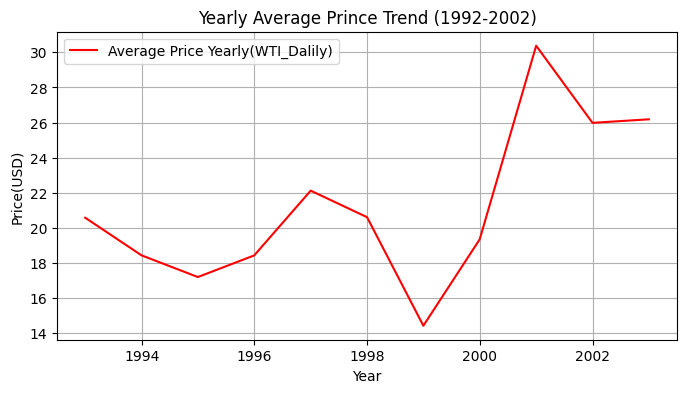

In [104]:
plt.figure(figsize=(8,4))
plt.plot(wti_yearly_price.index, wti_yearly_price['Price'], label='Average Price Yearly(WTI_Dalily)', color='red')
plt.title('Yearly Average Prince Trend (1992-2002)')
plt.xlabel('Year')
plt.ylabel('Price(USD)')
plt.legend()
plt.grid(True)
plt.show()

In [105]:
brent_yearly_price = df_brent_period.resample('YE').mean()
print(brent_yearly_price)

                Price
Date                 
1992-12-31  19.319728
1993-12-31  17.013413
1994-12-31  15.856389
1995-12-31  17.015850
1996-12-31  20.639803
1997-12-31  19.108508
1998-12-31  12.758103
1999-12-31  17.901566
2000-12-31  28.660672
2001-12-31  24.455720
2002-12-31  24.993255


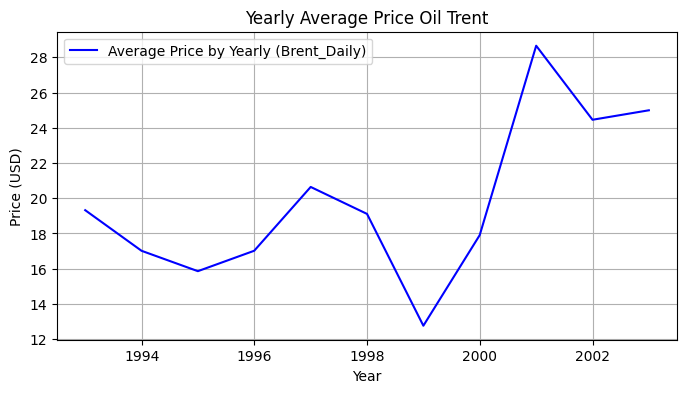

In [107]:
plt.figure(figsize=(8,4))
plt.plot(brent_yearly_price.index,brent_yearly_price['Price'], label= 'Average Price by Yearly (Brent_Daily)',color='blue')
plt.title('Yearly Average Price Oil Trent')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

## Comparison Between Prices

### Q3. Compare the both the average prices of a barrel of oil from 1992-2002, indicate significant differences though markers.

In [109]:
df_compare = pd.DataFrame(
   {
     'WTI':  wti_yearly_price['Price'],
     'Brent': brent_yearly_price['Price']
   }
).loc['1992-01-01' : '2002-12-31']

In [110]:
df_compare.head()

,WTI,Brent
Date,,
1992-12-31,20.575564,19.319728
1993-12-31,18.432200,17.013413
1994-12-31,17.196429,15.856389
1995-12-31,18.428805,17.015850
1996-12-31,22.119173,20.639803


In [111]:
# Calculate the difference
df_compare['Difference'] =  df_compare['Brent'] - df_compare['WTI']
print(df_compare)


                  WTI      Brent  Difference
Date                                        
1992-12-31  20.575564  19.319728   -1.255837
1993-12-31  18.432200  17.013413   -1.418787
1994-12-31  17.196429  15.856389   -1.340040
1995-12-31  18.428805  17.015850   -1.412955
1996-12-31  22.119173  20.639803   -1.479370
1997-12-31  20.608254  19.108508   -1.499746
1998-12-31  14.422072  12.758103   -1.663969
1999-12-31  19.344980  17.901566   -1.443414
2000-12-31  30.378520  28.660672   -1.717848
2001-12-31  25.983120  24.455720   -1.527400
2002-12-31  26.184960  24.993255   -1.191705


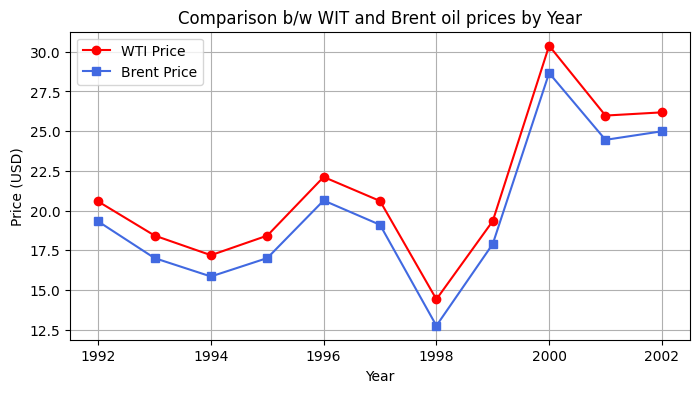

In [116]:
plt.figure(figsize=(8,4))
plt.plot(df_compare.index.year, df_compare['WTI'], marker='o', label='WTI Price', color= 'red')
plt.plot(df_compare.index.year, df_compare['Brent'], marker='s', label= 'Brent Price', color= 'royalblue')

plt.title('Comparison b/w WIT and Brent oil prices by Year')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

                  WTI      Brent  Difference
Date                                        
1998-12-31  14.422072  12.758103   -1.663969
2000-12-31  30.378520  28.660672   -1.717848


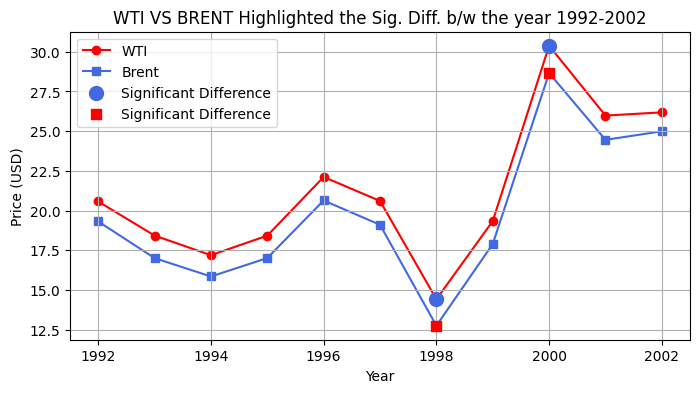

In [122]:
threshold= 1.6
# Filters theose lines having difference more than threshold
sig_diff= df_compare[abs(df_compare['Difference'])> threshold]
print(sig_diff)
plt.figure(figsize=(8,4))
plt.plot(df_compare.index.year, df_compare['WTI'], marker='o', color='red', label='WTI', zorder=1)
plt.plot(df_compare.index.year, df_compare['Brent'], marker='s', color='royalblue', label='Brent', zorder=1)

# Highliting the Significant Difference Year
plt.scatter(sig_diff.index.year, sig_diff['WTI'], label='Significant Difference', color='royalblue', marker='o', s=100, zorder=5)
plt.scatter(sig_diff.index.year, sig_diff['Brent'], label='Significant Difference', color='red', marker='s', s=50, zorder=5)

plt.title('WTI VS BRENT Highlighted the Sig. Diff. b/w the year 1992-2002')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

### Summary, Both have highly correlated behaviour in these years. there's no significant behaviour is observed except during 1998 to 2002.